In [22]:
# Importing libraries
import numpy as np
import time 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd


from science_jubilee.Machine import Machine
from science_jubilee.tools.Tool import Tool
from science_jubilee.decks.Deck import Deck
from science_jubilee.labware.Labware import Labware, Location, Well
# from science_jubilee.tools.Pipette import Pipette
from science_jubilee.tools.Double_Syringe import DoubleSyringe
from science_jubilee.tools.Syringe import Syringe
from science_jubilee.tools.Vacuum_Gripper import VacuumGripper
from science_jubilee.tools.Oceandirect_axo import Spectrometer

In [23]:
# Manual Offsetting 

deck = Deck("lab_automation_deck") # We are not using the deck, so operate any deck.json 

# -------------Position JSON file for Single Syringe ---------------------#
samples2_ssy = deck.load_labware("uwsunlab_10_wellplate_11000ul_ssy_1.json", slot = 2)
samples2_ssy.manual_offset2([[132.0, 134.0], [38.0, 134.0], [38.0, 175.0]], save = True)
samples5_ssy = deck.load_labware("uwsunlab_10_wellplate_11000ul_ssy_2.json", slot = 5)
samples5_ssy.manual_offset2([[271.0, 231.0], [177.0, 231.0], [177.0, 273.0]], save = True)
solvents = deck.load_labware("uwsunlab_2_wellplate_60000ul_slot3.json", slot = 3)
solvents.manual_offset_small_plate([[245.0, 155.8], [197.0, 155.8]], save = True)
    
# -------------Position JSON file for Dual Syringe ---------------#
samples2_sy = deck.load_labware('uwsunlab_10_wellplate_11000ul_sy_1.json', slot = 2)     #new config
samples2_sy.manual_offset2([[130.7, 131.6],[37.7, 131.6], [37.7, 172.6]], save = True)
samples5_sy = deck.load_labware('uwsunlab_10_wellplate_11000ul_sy_2.json', slot = 5)     #new config
samples5_sy.manual_offset2([[270.0, 228.0], [178.0, 228.0], [177.0, 270.0]], save = True)
precursors = deck.load_labware('uwsunlab_2_wellplate_60000ul_slot1.json', slot = 1)
precursors.manual_offset_small_plate([[245.0, 60.0], [197.0, 60.0]], save = True)
# -----------Position JSON file for Spectrometer----------------# 

samples2_spec = deck.load_labware('uwsunlab_10_wellplate_11000ul_spec_1.json', slot = 2)   #new config
samples2_spec.manual_offset2([[127.4, 131.6],[33.4, 131.6], [33.4, 172.7]], save = True)
samples5_spec = deck.load_labware('uwsunlab_10_wellplate_11000ul_spec_2.json', slot = 5)   #new config
samples5_spec.manual_offset2([[268.0, 229.3], [173.3, 229.3], [174.3, 270.7]], save = True)

 

# ----------Position JSON file for Vacuum Gripper---------------#

Manual offset applied to 
Manual offset saved
Manual offset applied to 
Manual offset saved
Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset saved.
Manual offset applied to 
Manual offset saved
Manual offset applied to 
Manual offset saved
Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset saved.
Manual offset applied to 
Manual offset saved
Manual offset applied to 
Manual offset saved


In [24]:
# Intialising and homing the Machine 

axo = Machine(address = '192.168.1.2')

In [26]:
axo.home_all()
axo.move_to(z=180) # Safest Z location

e0, e1: None None
G0 Z180.00     F6000.00 


In [25]:
# Loading the labwares

deck = axo.load_deck("lab_automation_deck")

## ---------------------OT2 1000ul Pipette ----------------------------##
# tiprack = axo.load_labware("opentrons_96_tiprack_1000ul_axo.json", 5)
# tiprack.load_manualOffset()
# samples_ot2 = axo.load_labware('uwsunlab_12_wellplate_4000ul_pipette_1.json', 2)
# samples_ot2.load_manualOffset()
# samples2_ot2 = axo.load_labware('uwsunlab_12_wellplate_4000ul_pipette_2.json', 0)
# samples2_ot2.load_manualOffset()
solvents = axo.load_labware('uwsunlab_2_wellplate_60000ul_slot3.json', 3)
solvents.load_manualOffset()
trash = (-0.9, 55.8, 99)
## -------------------------------------------------------------------##
#pipette = Pipette(0, "Pipette", brand = "opentron", model = "config", max_volume= 20, min_volume= 0, zero_position = (0,0,0),\
#    blowout_position=None, drop_tip_position = None, mm_to_ul = None)# model = "config")


## ---------------------Single Syringe Pump ----------------------------##
samples2_ssy = axo.load_labware('uwsunlab_10_wellplate_11000ul_ssy_1.json', 2)         #new config
samples2_ssy.load_manualOffset()
samples5_ssy = axo.load_labware('uwsunlab_10_wellplate_11000ul_ssy_2.json', 5)         #new config
samples5_ssy.load_manualOffset()

## ---------------------Dual Syringe Pump ----------------------------##
samples2_sy = axo.load_labware('uwsunlab_10_wellplate_11000ul_sy_1.json', 2)         #new config
samples2_sy.load_manualOffset()
samples5_sy = axo.load_labware('uwsunlab_10_wellplate_11000ul_sy_2.json', 5)         #new config
samples5_sy.load_manualOffset()
precursors = axo.load_labware('uwsunlab_2_wellplate_60000ul_slot1.json', 1)
precursors.load_manualOffset()

## --------------------------Spectrometer -------------------------------##
samples2_spec = axo.load_labware('uwsunlab_10_wellplate_11000ul_spec_1.json', 2)  #new config
samples2_spec.load_manualOffset()
samples5_spec = axo.load_labware('uwsunlab_10_wellplate_11000ul_spec_2.json', 5)
samples5_spec.load_manualOffset()

## ------------------------Vacuum Gripper --------------------------------##
vacuum_location = [(84, 51, 0),  # Slot 0 (12 Well Plate)
                   (225, 57, 0), # Slot 1 (2 Precursor Container)
                   (84, 147, 0), # Slot 2 (12 Well Plate)
                   (225, 149, 0), # Slot 3 (1 Solvent Container)
                   (79, 244, 0)] # Slot 4 (Lid Containter)



Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset applied to 
Manual offset applied to 
Manual offset applied to 
Manual offset applied to 
Manual offset applied (1×2 plate),  x_adjust=0.0, y_adjust=0.0
Manual offset applied to 
Manual offset applied to 


In [27]:
axo.get_position()

{'X': '100.000',
 'Y': '60.000',
 'Z': '180.000',
 'U': '0.000',
 'E': '0.000',
 'E0': '-0.0',
 'E1': '-0.0',
 'E2': '-0.0'}

<h1> Single Syringe

In [28]:
# Loading the Dual Syringe

single_syringe = Syringe(index = 0, 
                        name = 'single_syringe', 
                        config = 'single_syringe')
# You always need to load your tool to the machine
axo.load_tool(single_syringe)

In [29]:
axo.pickup_tool(single_syringe)

In [34]:
# If the syringe has some water inside it, and we dont want to reset its position, we can use the following code
# In this code we can move the syringe to the precursor location and then reset its position

drive = single_syringe.e_drive
current_pos = float(single_syringe._machine.get_position()[drive])
headroom_mm = current_pos - single_syringe.min_range
headroom_ml = headroom_mm / single_syringe.mm_to_ml
single_syringe.dispense(vol= headroom_ml, sample_loc=precursors[1].top(-10), refill_loc=precursors[1].top(-10), s=150)
print(current_pos)

e0, e1: None None
G0 Z100.00     F6000.00 
e0, e1: None None
G0  X197.00 Y60.00   F6000.00 
e0, e1: None None
G0 Z43.00     F6000.00 
e0, e1: -81.90 None
G0 Z0.00 X0.00 Y0.00 E-81.90 V0.00 F150.00 
81.9


In [24]:
#aspirate liquid 
single_syringe.aspirate(vol= 0.1, location= solvents[1].top(-40), s= 300)

e0, e1: None None
G0 Z100.00     F6000.00 
e0, e1: None None
G0  X197.00 Y155.80   F6000.00 
e0, e1: None None
G0 Z13.00     F6000.00 
e0, e1: 1.45 None
G0 Z0.00 X0.00 Y0.00 E1.45 V0.00 F300.00 


In [25]:
# dispense liquid
single_syringe.dispense(vol= 4, sample_loc= samples2_ssy[0].top(-5), refill_loc= precursors[1].top(-40), s= 300)

e0, e1: None None
G0 Z100.00     F6000.00 
e0, e1: None None
G0  X197.00 Y60.00   F6000.00 
e0, e1: None None
G0 Z13.00     F6000.00 
e0, e1: 99.20 None
G0 Z0.00 X0.00 Y0.00 E99.20 V0.00 F150.00 
e0, e1: -10.00 None
G0 Z0.00 X0.00 Y0.00 E-10.00 V0.00 F150.00 
e0, e1: None None
G0 Z100.00     F6000.00 
e0, e1: None None
G0  X132.00 Y134.00   F6000.00 
e0, e1: None None
G0 Z74.99     F6000.00 
e0, e1: -58.00 None
G0 Z0.00 X0.00 Y0.00 E-58.00 V0.00 F300.00 


In [32]:
# Mix a solution 
single_syringe.mix(vol= 2, loc= samples2_ssy[0].top(-55), num_cycles= 1, s= 500)

e0, e1: None None
G0 Z100.00     F6000.00 
e0, e1: None None
G0  X132.00 Y134.00   F6000.00 
e0, e1: None None
G0 Z24.99     F6000.00 
e0, e1: 29.00 None
G0 Z0.00 X0.00 Y0.00 E29.00 V0.00 F500.00 
e0, e1: None None
G0 Z100.00     F6000.00 
e0, e1: None None
G0  X132.00 Y134.00   F6000.00 
e0, e1: None None
G0 Z24.99     F6000.00 
e0, e1: -29.00 None
G0 Z0.00 X0.00 Y0.00 E-29.00 V0.00 F500.00 


In [16]:
# always reset the syringe position before parking 
single_syringe.reset_position()

e0, e1: -82.00 None
G0 Z0.00 X0.00 Y0.00 E-82.00 V0.00 F150.00 


In [30]:
axo.park_tool()

<h1> Dual Syringe

In [83]:
# Loading the Dual Syringe

dual_syringe = DoubleSyringe(index = 2, 
                        name = 'Dual_Syringe', 
                        config = '10cc_syringe')
# You always need to load your tool to the machine
axo.load_tool(dual_syringe)

In [84]:
axo.pickup_tool(dual_syringe)

In [85]:
dual_syringe.reset_position()

e0, e1: 0.00 0.00
G0 Z0.00 X0.00 Y0.00 E0.00:0.00 V0.00 F150.00 


In [ ]:
# If the syringe has some water inside it, and we dont want to reset its position, we can use the following code
# In this code we can move the syringe to the precursor location and then reset its position

# drive0 = dual_syringe.e0_drive
# current_pos0 = float(dual_syringe._machine.get_position()[drive0])
# headroom_mm0 = current_pos0 - dual_syringe.min_range
# headroom_ml0 = headroom_mm0 / dual_syringe.mm_to_ml
# dual_syringe.dispense_e0(vol= headroom_ml0, sample_loc_e=precursors[1], refill_loc_e=precursors[1], s=50)
# print(current_pos0)

120.5


In [ ]:
# drive1 = dual_syringe.e1_drive
# current_pos1 = float(dual_syringe._machine.get_position()[drive1])
# headroom_mm1 = current_pos1 - dual_syringe.min_range
# headroom_ml1 = headroom_mm1 / dual_syringe.mm_to_ml
# dual_syringe.dispense_e1(vol= headroom_ml1, sample_loc_v=precursors[0], refill_loc_v=precursors[0], s=500)
# print(current_pos1)

47.8


In [88]:
# Refill any syringe. 
dual_syringe.refill(drive = dual_syringe.e0_drive, refill_loc = solvents[0].top(-54), s = 500)
# syringe.refill(drive = syringe.e1_drive, refill_loc = precursors[0], s = 50)

e0, e1: None None
G0 Z100.00     F6000.00 
e0, e1: None None
G0  X245.00 Y155.80   F6000.00 
e0, e1: None None
G0 Z9.00     F6000.00 
e0, e1: 150.00 None
G0 Z0.00 X0.00 Y0.00 E150.00 V0.00 F500.00 
e0, e1: -10.00 None
G0 Z0.00 X0.00 Y0.00 E-10.00 V0.00 F500.00 


In [ ]:
# import time 

# Dispense 1ml water into open-beaker at Deck 0 
# for i in range(10):
dual_syringe.dispense_e0(0.5, sample_loc_e=samples5_sy[0].top(-20), refill_loc_e=precursors[0].top(-54), s=500)
# time.sleep(2)

e0, e1: None None
G0 Z100.00     F6000.00 
e0, e1: None None
G0  X318.00 Y229.00   F6000.00 
e0, e1: None None
G0 Z59.99     F6000.00 
e0, e1: -7.27 None
G0 Z0.00 X0.00 Y0.00 E-7.27 V0.00 F500.00 


0.5

In [ ]:
# for i in range(10):
dual_syringe.dispense_e1(0.5, sample_loc_v=samples5_sy[0].top(-20), refill_loc_v=precursors[0].top(-54), s=500)
    # time.sleep(2)


e0, e1: None None
G0 Z100.00     F6000.00 
e0, e1: None None
G0  X270.00 Y229.00   F6000.00 
e0, e1: None None
G0 Z59.99     F6000.00 
e0, e1: None -7.27
G0 Z0.00 X0.00 Y0.00 E0:-7.27 V0.00 F500.00 


0.5

In [89]:
dual_syringe.reset_position()

e0, e1: -140.00 0.00
G0 Z0.00 X0.00 Y0.00 E-140.00:0.00 V0.00 F150.00 


In [90]:
axo.park_tool()

e0, e1: None None
G0 Z100.00     F6000.00 


<h1>SPECTROMETER

In [7]:
# Load the spectrometer

spectrometer = Spectrometer(index = 3, 
                            name = 'Spectrometer', 
                            base_dir=r"C:\Users\ADITI\Downloads\Aditya\Axo_Jubilee\science-jubilee\axo\spectrum_data",
                            plate_id = 'testing_5')
                            # ref_dark = 'dark_20250708_135633.npy',
                            # ref_white = 'white_20250708_135624.npy')
axo.load_tool(spectrometer)

Opened Spectrometer 2


In [20]:
axo.pickup_tool(spectrometer)

In [9]:
spectrometer.configure_device()

In [ ]:
# wash the probe before starting the experiment
spectrometer.wash_probe(solvents[1].top(-20))

In [15]:
spectrometer.position_probe(samples5_spec[9].top(-30))

e0, e1: None None
G0 Z101.00     F6000.00 
e0, e1: None None
G0  X174.30 Y270.70   F6000.00 
e0, e1: None None
G0 Z54.99     F6000.00 


In [17]:
spectrometer.set_dark()

'dark_20250709_131737'

In [16]:
spectrometer.set_white()

'white_20250709_131732'

(2068, 2)
(2068, 2)


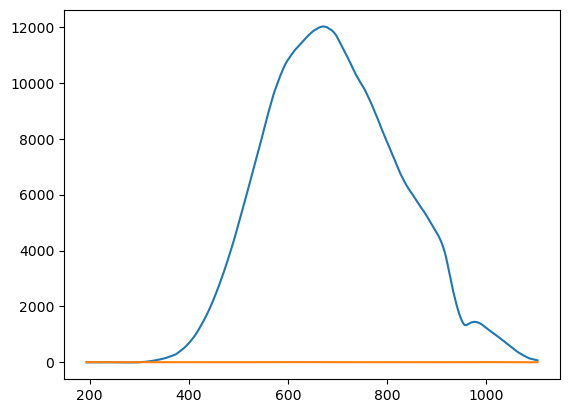

In [43]:
white = np.load(spectrometer._white_path)
dark = np.load(spectrometer._dark_path)
print(white.shape)
plt.plot(white[:, 0], white[:, 1])
plt.plot(dark[:, 0], dark[:, 1])
print(dark.shape)

YELLOW

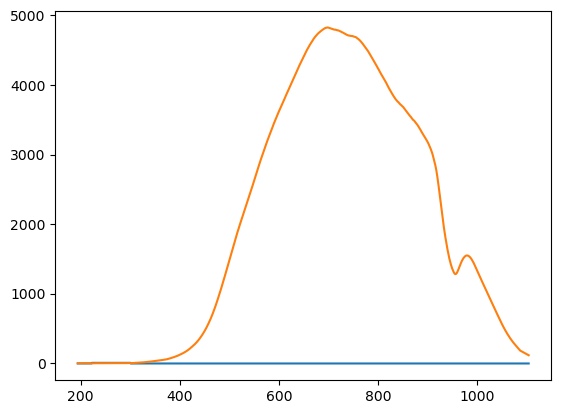

In [46]:
wavelengths, vals, absorbance = spectrometer.collect_spectrum(samples_spec[0].top(-10), 15, save= True)
plt.plot(wavelengths, absorbance, label="Absorbance")
plt.plot(wavelengths, vals, label="Intensity")
# wavelengths, absorbance = spectrometer.plot_spectrum(solvent[0], elapsed_min=15, show_plot=True, save_plot=True)    

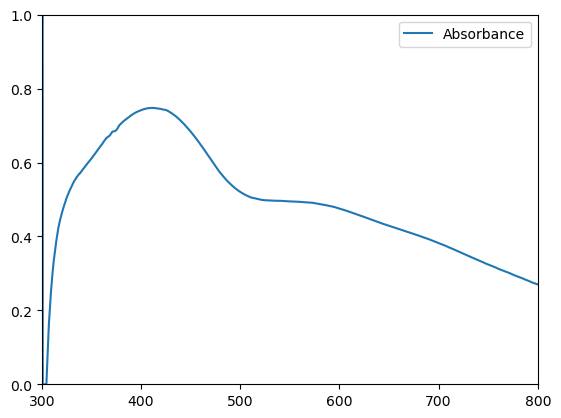

In [49]:
plt.plot(wavelengths, absorbance, label="Absorbance")
# plt.plot(wavelengths, vals, label="Intensity")
plt.xlim(300, 800)
plt.ylim(0, 1)
plt.legend()

BLUE

Plot saved to: C:\Users\ADITI\Downloads\Aditya\Axo_Jubilee\science-jubilee\axo\spectrum_data\testing_5\A1_15min_absorbance.png


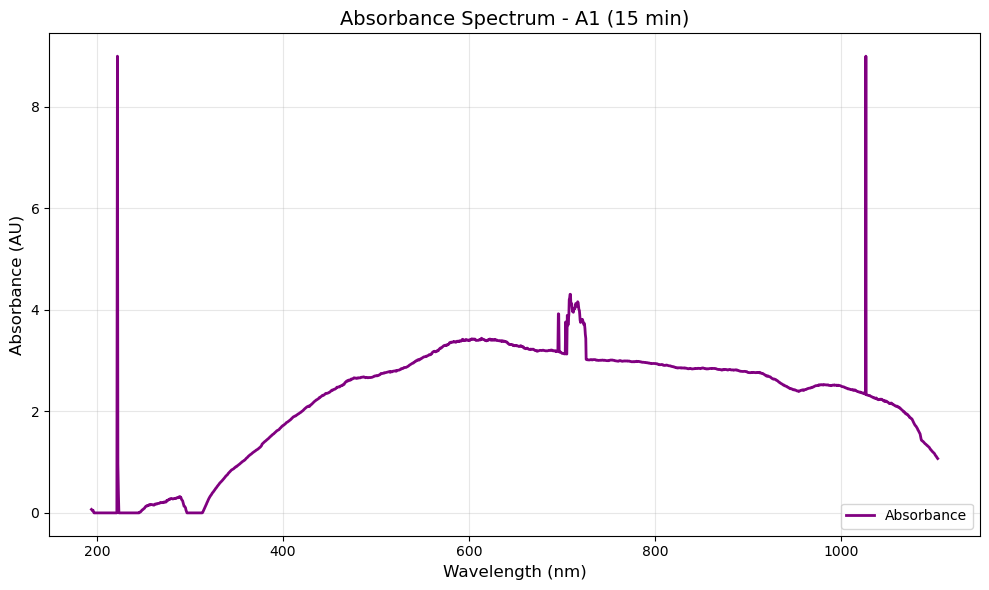

In [ ]:
wavelengths_blue, vals_blue, absorbance_blue = spectrometer.collect_spectrum(samples_spec[0].top(-19), 15, save= True)
# plt.plot(wavelengths_blue, absorbance_blue, label="Absorbance")
# plt.plot(wavelengths_blue, vals, label="Intensity")
wavelengths_blue, absorbance_blue = spectrometer.plot_spectrum(samples_spec[0].top(-19), elapsed_min=15, show_plot=True, save_plot=True)   

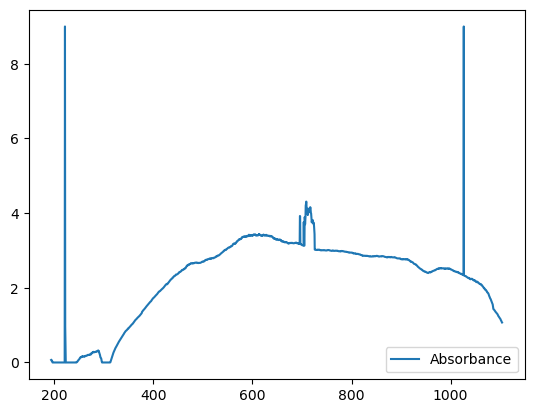

In [27]:
plt.plot(wavelengths_blue, absorbance_blue, label="Absorbance")
# plt.xlim(400, 800)
# plt.ylim(0, 1)
plt.legend()

RED

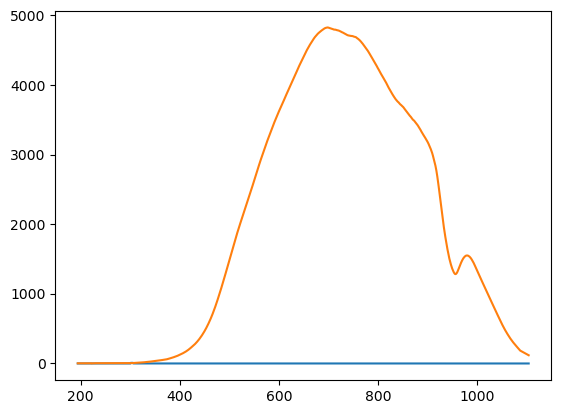

In [50]:
wavelengths_red, vals_red, absorbance_red = spectrometer.collect_spectrum(samples_spec[3].top(-10), 15, save= True)
plt.plot(wavelengths_red, absorbance_red, label="Absorbance")
plt.plot(wavelengths_red, vals, label="Intensity")

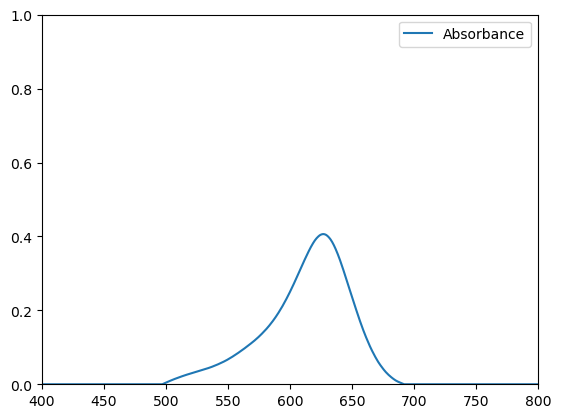

In [51]:
plt.plot(wavelengths_blue, absorbance_blue, label="Absorbance")
plt.xlim(400, 800)
plt.ylim(0, 1)
plt.legend()

YELLOW READING 1

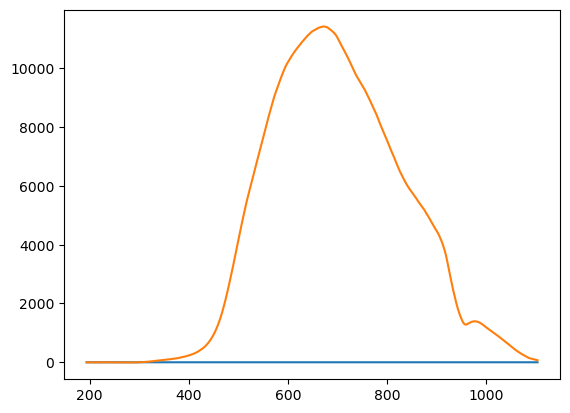

In [37]:
wavelengths_y1, vals_y1, absorbance_y1 = spectrometer.collect_spectrum(samples_spec[0].top(-10), 15, save= True)
plt.plot(wavelengths_y1, absorbance_y1, label="Absorbance")
plt.plot(wavelengths_y1, vals_y1, label="Intensity")
# wavelengths, absorbance = spectrometer.plot_spectrum(solvent[0], elapsed_min=15, show_plot=True, save_plot=True)    

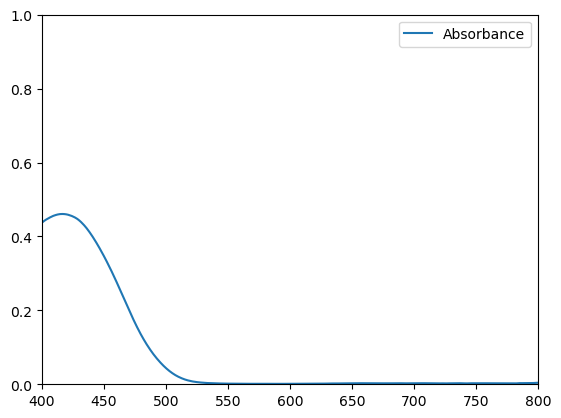

In [38]:
plt.plot(wavelengths_y1, absorbance_y1, label="Absorbance")
plt.xlim(400, 800)
plt.ylim(0, 1)
plt.legend()

In [28]:
for i in range(5):
    spectrometer.position_probe(solvent[0].top(-13))

YELLOW READING 2

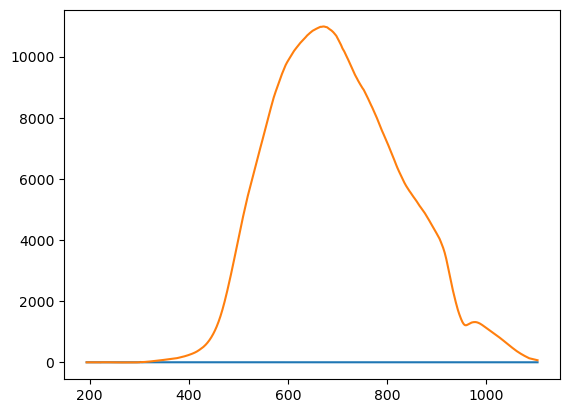

In [40]:
wavelengths_y2, vals_y2, absorbance_y2 = spectrometer.collect_spectrum(samples_spec[0].top(-10), 15, save= True)
plt.plot(wavelengths_y2, absorbance_y2, label="Absorbance")
plt.plot(wavelengths_y2, vals_y2, label="Intensity")
# wavelengths, absorbance = spectrometer.plot_spectrum(solvent[0], elapsed_min=15, show_plot=True, save_plot=True)  2

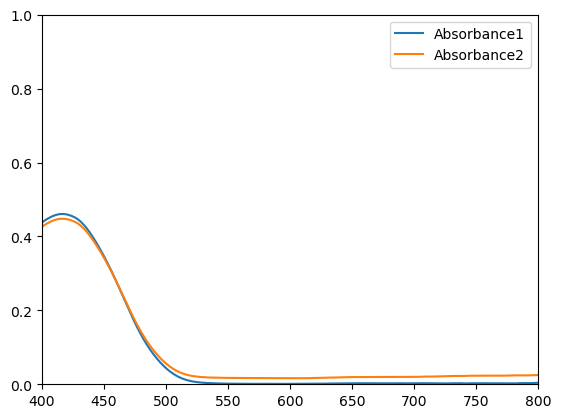

In [41]:
plt.plot(wavelengths_y1, absorbance_y1, label="Absorbance1")
plt.plot(wavelengths_y2, absorbance_y2, label="Absorbance2")
plt.xlim(400, 800)
plt.ylim(0, 1)
plt.legend()

In [ ]:
# Position Probe and take readings one by one. 
# Also plot the Absorbance spectrum side by side. 

for i in range(6):
    # spectrometer.position_probe(samples_spec[i].top(-5))
    wavelengths, vals, absorbance = spectrometer.collect_spectrum(samples_spec[i].top(-5), elapsed_min=15, save= True)

    # Single spectrum plot
    wavelengths, absorbance = spectrometer.plot_spectrum(samples_spec[0], elasped_min=15, show_plot=True, save_plot=True)    

In [34]:
# Just position the probe
for i in range(10):
    spectrometer.position_probe(samples_spec[i].top(-5))

In [21]:
axo.park_tool()

<h1>VACUUM

In [53]:
# Vacumm Gripper
gripper = VacuumGripper(index = 4, 
                        name = 'Vacuum_Gripper', 
                        vacuum_pin = 0,
                        limit_switch_pin = 2)
axo.load_tool(gripper)

In [54]:
axo.pickup_tool(gripper)

In [58]:
# gripper.grip(vacuum_location[4], pwm= 0.7)
gripper.drop(vacuum_location[4])

In [63]:
gripper.pick_and_place(vacuum_location[0],
                       vacuum_location[4], 0.7, 3)

In [ ]:
axo.park_tool()